# Task 03 - Explore Unsupervised Machine Learning

## Contents

### [1. Introduction](#intro)

### [2. Data Preparation](#data)
   * **Import the required libraries**
   * **Load the dataset**
   
### [3. Predicting number of Clusters](#numclus)
   * **Elbow Method**
   * **Silhouette Index**

### [4. Model Architecture](#represent)

<a id="intro"></a>
## 1. Introduction

#### About the task
For the given Iris dataset, predict the optimum number of clusters and represent it visually using **K-means Algorithm**.

<a id="data"></a>
## 2. Data Preparation

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np

# Libraries used for generating plots.
import matplotlib.pyplot as plt
import seaborn as sns

# Import the Iris dataset
from sklearn.datasets import load_iris

# K means clustering model
from sklearn.cluster import KMeans

# For Silhouette Coefficient Method
from sklearn.metrics import silhouette_score

%matplotlib inline

import warnings

warnings.filterwarnings("ignore")

#### Load the dataset

In [2]:
iris = load_iris()

X = load_iris().data
y = load_iris().target

<a id="numclus"></a>
## 3. Predicting number of Clusters

### Elbow Method
The idea behind elbow method is to run k-means clustering on a given dataset for a range of values of k (num_clusters, e.g k=1 to 10), and for each value of k, calculate sum of squared errors (SSE).

After that, plot a line graph of the SSE for each value of k. The graph looks like an "elbow" of the arm and that is the value of optimal k (number of cluster). Here, we want to minimize SSE. SSE tends to decrease toward 0 as we increase k (and SSE is 0 when k is equal to the number of data points in the dataset, because then each data point is its own cluster, and there is no error between it and the center of its cluster).

So the goal is to choose a small value of k that still has a low SSE, and the elbow usually represents where we start to have diminishing returns by increasing k.

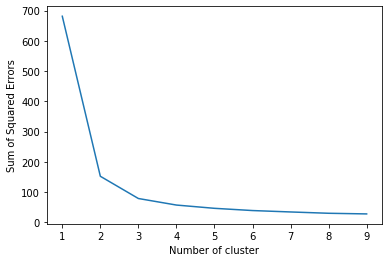

In [3]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(X)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Sum of Squared Errors")
plt.show()

As we can see, the optimal number of clusters is **3**.

### Silhouette Coefficient Method
Silhouette analysis refers to a method of interpretation and validation of consistency within clusters of data. The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

If the Silhouette index value is high, the object is well-matched to its own cluster and poorly matched to neighbouring clusters. The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient is defined as –

S(i) = ( b(i) – a(i) ) / ( max { ( a(i), b(i) ) }

Where,

   * a(i) is the average dissimilarity of ith object to all other objects in the same cluster.
    
   * b(i) is the average dissimilarity of ith object with all objects in the closest cluster.

Now, obviously S(i) will lie between [-1, 1] –

   * If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.
    
   * If silhouette value is about to 0, sample could be assign to another cluster closest to it and the sample lies equally far away from both the clusters. That means it indicates overlapping clusters.
    
   * If silhouette value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.


In [4]:
for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster).fit(X)
    label = kmeans.labels_
    sil_coeff = silhouette_score(X, label, metric='euclidean')
    print("For n_clusters = {}, The Silhouette Coefficient = {}".format(n_cluster, sil_coeff))

For n_clusters = 2, The Silhouette Coefficient = 0.681046169211746
For n_clusters = 3, The Silhouette Coefficient = 0.5528190123564091
For n_clusters = 4, The Silhouette Coefficient = 0.4980505049972867
For n_clusters = 5, The Silhouette Coefficient = 0.4887488870931048
For n_clusters = 6, The Silhouette Coefficient = 0.3648340039670018
For n_clusters = 7, The Silhouette Coefficient = 0.35439644785886376
For n_clusters = 8, The Silhouette Coefficient = 0.34971214866102873
For n_clusters = 9, The Silhouette Coefficient = 0.3286759915149051
For n_clusters = 10, The Silhouette Coefficient = 0.3344660852135673


Here, the Silhouette Coefficient is highest for 2 clusters, but the Iris dataset has 3 types of plants. So having 2 clusters do not make any sense. 

Therefore, the next highest Silhouette Coefficient is for 3 clusters, and hence the optimal number of clusters is **3**.

<a id="represent"></a>
## 4. Model Architecture

In [5]:
# Perform K means clustering with 3 clusters.
clustering = KMeans(n_clusters=3, random_state=10)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [6]:
target_predicted = np.choose(clustering.labels_,[0,1,2]).astype(np.int64)

In [7]:
iris_df = pd.DataFrame(iris.data)
iris_df.columns = ['sepal_length','sepal_width','petal_length','petal_width']
y = pd.DataFrame(iris.target)
y.columns =['Targets']

Text(0.5, 1.0, 'This is Actual Flower Cluster')

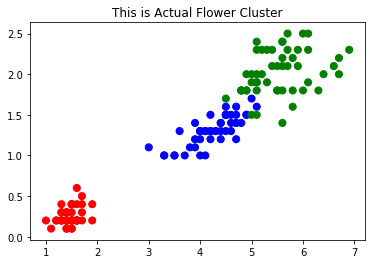

In [8]:
color_theme = np.array(['red','blue','green'])

# Plot the data points.
plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width, c=color_theme[iris.target],s=50)
plt.title("This is Actual Flower Cluster")

Text(0.5, 1.0, 'This is Predicted Clustering')

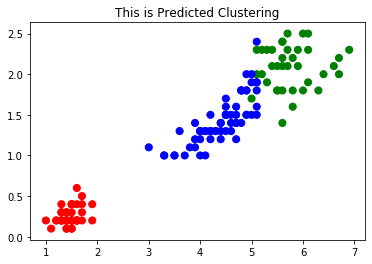

In [9]:
# Plot the predicted data points.
plt.scatter(x=iris_df.petal_length, y=iris_df.petal_width, c=color_theme[target_predicted],s=50)
plt.title("This is Predicted Clustering")